In [13]:
!Yes|sudo apt-get update
!pip install selenium
!Yes|sudo  apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

/bin/bash: Yes: command not found
Hit:1 http://international.download.nvidia.com/dgx/repos/bionic bionic InRelease
Ign:2 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://download.docker.com/linux/ubuntu bionic InRelease                
Hit:4 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://azure.archive.ubuntu.com/ubuntu bionic InRelease                  
Hit:6 https://nvidia.github.io/libnvidia-container/ubuntu18.04/amd64  InRelease
Hit:7 http://azure.archive.ubuntu.com/ubuntu bionic-updates InRelease          
Hit:8 https://nvidia.github.io/nvidia-container-runtime/ubuntu18.04/amd64  InRelease
Hit:9 http://azure.archive.ubuntu.com/ubuntu bionic-backports InRelease        
Hit:10 https://packages.microsoft.com/ubuntu/18.04/prod bionic InRelease       
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]   
Hit:13 http://ppa.launchpad.net/linuxuprising/java/ubuntu bi

In [ ]:
ls 

In [14]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import time

%matplotlib inline

In [1]:
 
# Crawl the meta data from ICCV official homepage
# Set up a browser to crawl from dynamic web pages 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

# Load URL for all CVPR 2020 accepted papers.
wd.get("https://conf.researchr.org/track/issta-2021/issta-2021-technical-papers#event-overview") #FIXME


<ipython-input-1-f36c6311c67c>:10: DeprecationWarning: use options instead of chrome_options
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


In [84]:
title_list = []
seletors = wd.find_elements_by_xpath('//table[@class="table table-condensed"]')
trs = seletors[0].find_elements_by_tag_name("tr")
for i in range(1,len(trs)):
    tds = trs[i].find_elements_by_tag_name('td')
    text = tds[1].text.split("\n")
#     print("title: ",text[0] )
#     print("author: ", text[-2] )
#     break
    title_list.append(text[0])

In [86]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

# print(stopwords.words('english'))

# stopwords_deep_learning = ['learning', 'network', 'neural', 'networks', 'deep', 'via', 'using', 'convolutional', 'single']

keyword_list = []

for i, title in enumerate(title_list):
  
#   print(i, "th paper's title : ", title)
    
  word_list = title.split(" ")
  word_list = list(set(word_list))
    
  word_list_cleaned = [] 
  for word in word_list: 
    word = word.lower()
    if word not in stopwords.words('english') :
          word_list_cleaned.append(word)  
    
  for k in range(len(word_list_cleaned)):
    keyword_list.append(word_list_cleaned[k])
  
keyword_counter = Counter(keyword_list)
# print(keyword_counter)  

print('{} different keywords before merging'.format(len(keyword_counter)))

# Merge duplicates: CNNs and CNN
duplicates = []
for k in keyword_counter:
    if k+'s' in keyword_counter:
        duplicates.append(k)
for k in duplicates:
    keyword_counter[k] += keyword_counter[k+'s']
    del keyword_counter[k+'s']
print('{} different keywords after merging'.format(len(keyword_counter)))
# print(keyword_counter)  

# print("")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/v-ensh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
keyword_counter

Counter({'function': 1,
         'large-scale': 1,
         'name': 1,
         'stripped': 1,
         'reassignment': 1,
         'binaries': 2,
         'lightweight': 1,
         'framework': 2,
         'based': 2,
         'backdoor': 1,
         'attack': 2,
         'system': 5,
         'learning': 4,
         'adversarial': 2,
         'advdoor:': 1,
         'deep': 6,
         'effectiveness': 1,
         'approach': 3,
         'android': 6,
         'ui': 1,
         'infrastructure': 1,
         'testing': 10,
         'improving': 1,
         'using': 2,
         'defense:': 1,
         'characterizing': 1,
         'robustness': 1,
         'examples': 1,
         '(experience': 3,
         'backporting': 1,
         'patch': 1,
         'linux': 1,
         'paper)': 3,
         'automated': 2,
         'detection': 3,
         'suite': 2,
         'key-points': 1,
         'many-objective': 1,
         'search': 3,
         'generation': 2,
         'automatic': 1,
 

In [88]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import time

%matplotlib inline

In [96]:
keywords_counter_vis

[('testing', 10),
 ('test', 8),
 ('deep', 6),
 ('android', 6),
 ('system', 5),
 ('via', 5),
 ('learning', 4),
 ('symbolic', 4),
 ('execution', 4),
 ('space', 4),
 ('fuzzing', 4),
 ('detecting', 4),
 ('analysis', 4),
 ('semantic', 4),
 ('approach', 3),
 ('(experience', 3),
 ('paper)', 3),
 ('detection', 3),
 ('search', 3),
 ('solving', 3),
 ('error', 3),
 ('configuration', 3),
 ('structure', 3),
 ('application', 3),
 ('binaries', 2),
 ('framework', 2),
 ('based', 2),
 ('attack', 2),
 ('adversarial', 2),
 ('using', 2),
 ('automated', 2),
 ('suite', 2),
 ('generation', 2),
 ('constraint', 2),
 ('prediction', 2),
 ('empirical', 2),
 ('continuous', 2),
 ('failure', 2),
 ('defect', 2),
 ('mutation', 2),
 ('faults', 2),
 ('exploring', 2),
 ('smart', 2),
 ('evaluation', 2),
 ('regression', 2),
 ('integration', 2),
 ('bugs', 2),
 ('finding', 2),
 ('data', 2),
 ('gui', 2),
 ('apps', 2),
 ('interval', 2),
 ('dnn', 2),
 ('static', 2),
 ('tool', 2),
 ('case', 2),
 ('function', 1),
 ('large-scale', 

In [99]:
print(key[:10])

['testing', 'test', 'deep', 'android', 'system', 'via', 'learning', 'symbolic', 'execution', 'space']


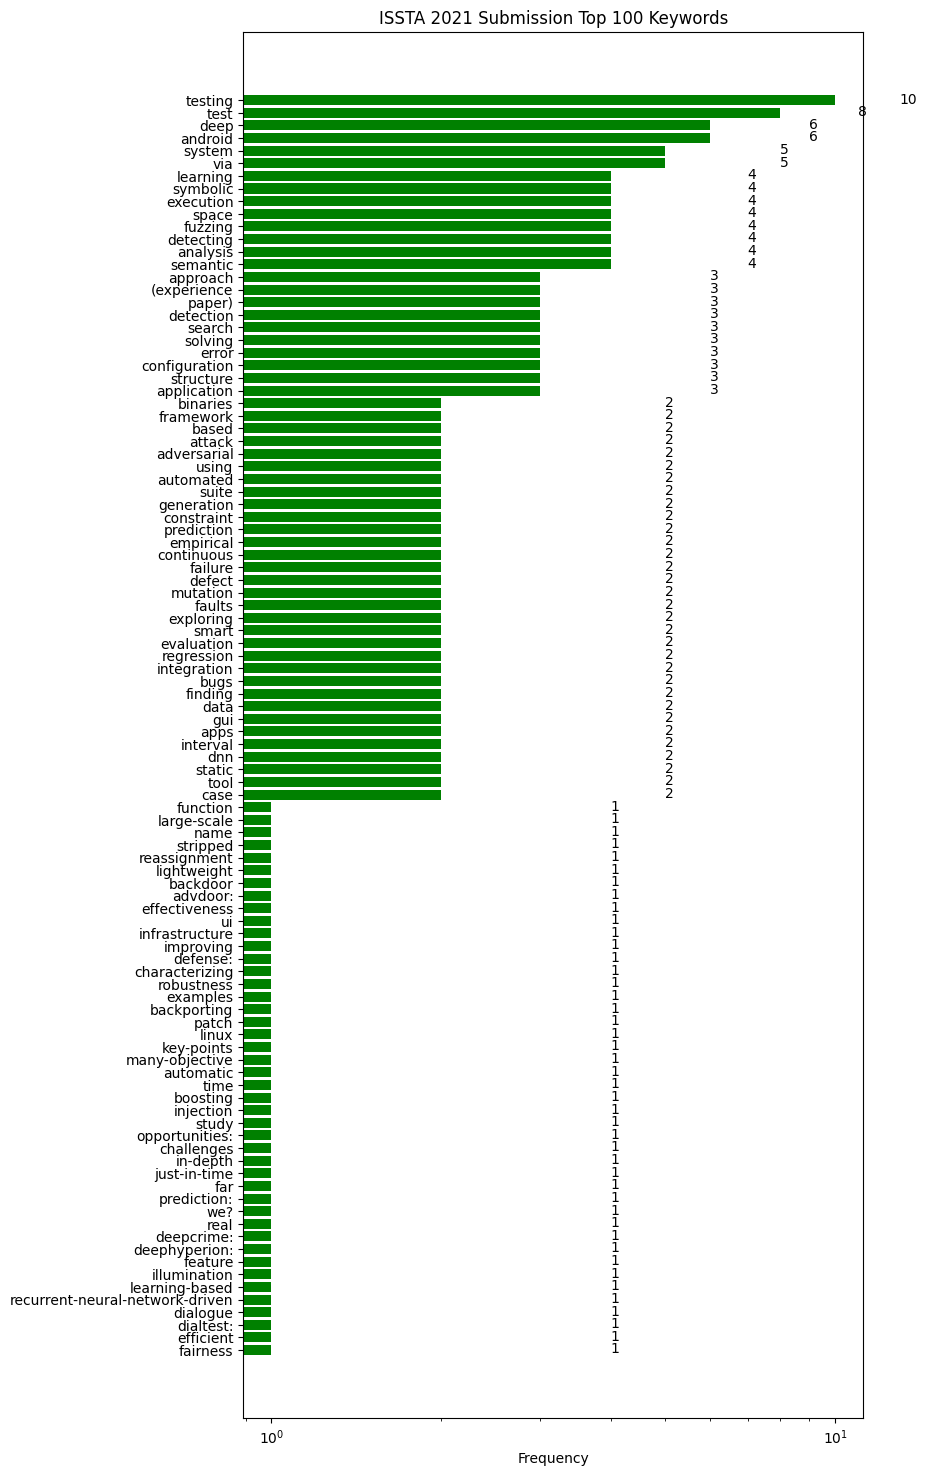

In [102]:
# Show N most common keywords and their frequencies
num_keyowrd = 100 #FIXME
keywords_counter_vis = keyword_counter.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 18))

key = [k[0] for k in keywords_counter_vis] 
value = [k[1] for k in keywords_counter_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel('Frequency')
ax.set_title('ISSTA 2021 Submission Top {} Keywords'.format(num_keyowrd))
plt.savefig("./issta_2021_acceptted_top100.png")
plt.show()


In [91]:
pip install wordcloud 

     |████████████████████████████████| 371 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


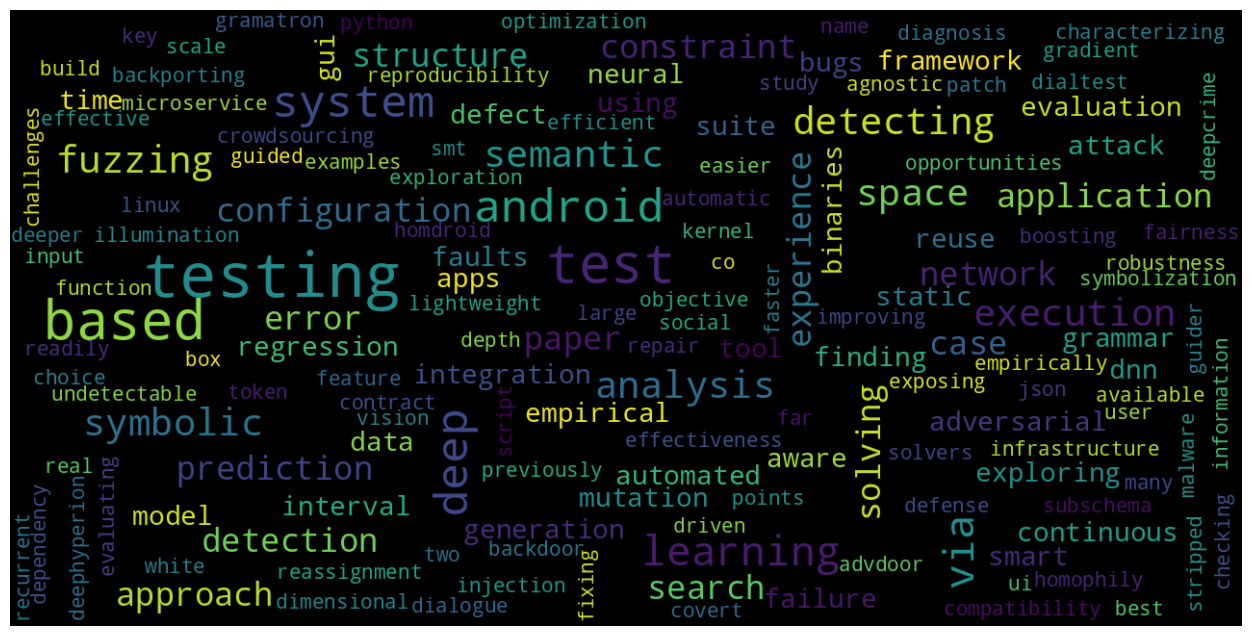

In [101]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=64, max_words=160, 
                      width=1280, height=640,
                      background_color="black").generate(' '.join(keyword_list))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("./issta_2021_accepted_wordcloud.png")
plt.show()

## Debug

In [66]:
 seletors = wd.find_elements_by_xpath('//table[@class="table table-condensed"]')

In [67]:
len(seletors)

1

In [68]:
len(trs)

52

In [83]:

trs = seletors[0].find_elements_by_tag_name("tr")
for i in range(1,len(trs)):
    tds = trs[i].find_elements_by_tag_name('td')
    text = tds[1].text.split("\n")
    print("title: ",text[0] )
    print("author: ", text[-2] )
    break

title:  A Lightweight Framework for Function Name Reassignment Based on Large-Scale Stripped Binaries
author:  Han Gao, Shaoyin Cheng, Yinxing Xue, Weiming Zhang


In [65]:
seletors[1]

IndexError: list index out of range

In [81]:
tds.get_attribute('href')

AttributeError: 'list' object has no attribute 'get_attribute'

In [76]:
trs = seletors[0].find_elements_by_tag_name("tr")
tds = trs[1].find_elements_by_tag_name('td')

In [77]:
print(tds[])

[<selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="d836082b-6f62-4d1b-8ef2-ce76a14bd4ab")>, <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="4c4d7355-8305-4c3f-9fd4-0df6231e093c")>]


In [80]:
print(tds[1].text)

A Lightweight Framework for Function Name Reassignment Based on Large-Scale Stripped Binaries
ACM SIGSOFT Distinguished Paper
Han Gao, Shaoyin Cheng, Yinxing Xue, Weiming Zhang
DOI


In [74]:
len(tds[1])

TypeError: object of type 'WebElement' has no len()

In [61]:
tds[1].text

'A Lightweight Framework for Function Name Reassignment Based on Large-Scale Stripped Binaries\nACM SIGSOFT Distinguished Paper\nHan Gao, Shaoyin Cheng, Yinxing Xue, Weiming Zhang\nDOI'

In [ ]:
    trs = tbody[0].find_elements_by_tag_name("tr")
    
    for j in range(1, len(trs)):
        tds = trs[j].find_elements_by_tag_name('td')

In [40]:
 seletors[0].getAttribute("href")

AttributeError: 'WebElement' object has no attribute 'getAttribute'

In [ ]:
for seletor in  seletor:
    text = 

In [39]:
 seletors[0].find_elements_by_xpath('//a[@href="#"]')

[<selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="227c17ff-986c-4366-a813-ff8fa202e2e7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="fa48bc5e-9311-4bc8-9690-ef6547f9e45f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="cd104091-02e0-4178-a8d3-3a10d0dcd851")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="41e4cf04-33c8-47ca-9c09-dec0c856b0a4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="81f91b50-b22c-43e4-be2b-03512bbf1ca5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="baa7865e-1d67-42be-8571-683af4888603")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="faab9b5f-2c37-47cc-88ce-04

In [ ]:
<a href="#" data-event-modal="7a33421b-b516-4529-97cf-e1dbd1a558d1">

In [2]:
wd

<selenium.webdriver.chrome.webdriver.WebDriver (session="1935b43187ec8f6d22f116ea6c7445ce")>

In [3]:
meta_list = [] 
wait_time = 0.5
max_try = 1000

title_list = []

table =  wd.find_elements_by_tag_name("table") 

In [5]:
print("length of table : ", len(table))

length of table :  32


In [18]:
i=0
tbody = table[i].find_elements_by_tag_name("tbody")
trs = tbody[0].find_elements_by_tag_name("tr")


In [19]:
tds = trs[0].find_elements_by_tag_name('td')

In [28]:
tds[1].text

''

In [23]:
title_a = tds.find_elements_by_tag_name('a')

AttributeError: 'list' object has no attribute 'find_elements_by_tag_name'

In [22]:
title_a 

[]

In [13]:
for j in range(1, len(trs)):
    tds = trs[j].find_elements_by_tag_name('td')
    print(tds)

[<selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="ce19503e-8b7f-4d7c-ad5d-1b804cf92dcd")>, <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="1d7b153a-0274-4fb1-a34f-ef3405684145")>, <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="583ea883-fe99-45b5-b409-29ea43b08524")>, <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="bc0f84e3-05fc-4b30-9dd5-de16ac31a586")>]
[<selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="52740695-1178-4c8c-8ec6-ad10cf29bcb8")>, <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="bc8a6311-104c-435d-ba09-a36145485c5f")>, <selenium.webdriver.remote.webelement.WebElement (session="1935b43187ec8f6d22f116ea6c7445ce", element="74e365a9-83c3-4cb8-812c-b15f867

In [16]:
 
# Crawl the meta data from ICCV official homepage
# Set up a browser to crawl from dynamic web pages 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

# Load URL for all CVPR 2020 accepted papers.
wd.get("http://cvpr2020.thecvf.com/program/main-conference") #FIXME

meta_list = [] 
wait_time = 0.5
max_try = 1000

title_list = []

table =  wd.find_elements_by_tag_name("table") 
print("length of table : ", len(table))

for i in range(len(table)):
    tbody = table[i].find_elements_by_tag_name("tbody")
    trs = tbody[0].find_elements_by_tag_name("tr")
    
    for j in range(1, len(trs)):
        tds = trs[j].find_elements_by_tag_name('td')
        print(i+1, "th table, ", j-1, "th paper : ", tds[3].text)
        title_list.append(tds[3].text)

print("The number of total accepted paper titles : ", len(title_list))

<ipython-input-16-418d68921ce6>:10: DeprecationWarning: use options instead of chrome_options
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


length of table :  45
1 th table,  0 th paper :  Unsupervised Learning of Probably Symmetric Deformable 3D Objects From Images in the Wild
1 th table,  1 th paper :  Footprints and Free Space From a Single Color Image
1 th table,  2 th paper :  Dynamic Fluid Surface Reconstruction Using Deep Neural Network
1 th table,  3 th paper :  CvxNet: Learnable Convex Decomposition
1 th table,  4 th paper :  BSP-Net: Generating Compact Meshes via Binary Space Partitioning
1 th table,  5 th paper :  Total3DUnderstanding: Joint Layout, Object Pose and Mesh Reconstruction for Indoor Scenes From a Single Image
1 th table,  6 th paper :  Generating and Exploiting Probabilistic Monocular Depth Estimates
1 th table,  7 th paper :  Neural Cages for Detail-Preserving 3D Deformations
1 th table,  8 th paper :  PIFuHD: Multi-Level Pixel-Aligned Implicit Function for High-Resolution 3D Human Digitization
1 th table,  9 th paper :  A Lighting-Invariant Point Processor for Shading
1 th table,  10 th paper :  A

4 th table,  53 th paper :  ZSTAD: Zero-Shot Temporal Activity Detection
4 th table,  54 th paper :  Geometric Structure Based and Regularized Depth Estimation From 360 Indoor Imagery
4 th table,  55 th paper :  Deep Kinematics Analysis for Monocular 3D Human Pose Estimation
4 th table,  56 th paper :  TEA: Temporal Excitation and Aggregation for Action Recognition
4 th table,  57 th paper :  Oops! Predicting Unintentional Action in Video
4 th table,  58 th paper :  Scene Recomposition by Learning-Based ICP
4 th table,  59 th paper :  Enhancing Cross-Task Black-Box Transferability of Adversarial Examples With Dispersion Reduction
4 th table,  60 th paper :  Single-Step Adversarial Training With Dropout Scheduling
4 th table,  61 th paper :  Deep Non-Line-of-Sight Reconstruction
4 th table,  62 th paper :  SSRNet: Scalable 3D Surface Reconstruction Network
4 th table,  63 th paper :  Progressive Relation Learning for Group Activity Recognition
4 th table,  64 th paper :  Cooling-Shrinki

8 th table,  21 th paper :  A Sparse Resultant Based Method for Efficient Minimal Solvers
8 th table,  22 th paper :  Zero-Reference Deep Curve Estimation for Low-Light Image Enhancement
8 th table,  23 th paper :  BlendedMVS: A Large-Scale Dataset for Generalized Multi-View Stereo Networks
8 th table,  24 th paper :  Convolution in the Cloud: Learning Deformable Kernels in 3D Graph Convolution Networks for Point Cloud Analysis
8 th table,  25 th paper :  A Semi-Supervised Assessor of Neural Architectures
8 th table,  26 th paper :  Learning a Reinforced Agent for Flexible Exposure Bracketing Selection
8 th table,  27 th paper :  CARS: Continuous Evolution for Efficient Neural Architecture Search
8 th table,  28 th paper :  Joint 3D Instance Segmentation and Object Detection for Autonomous Driving
8 th table,  29 th paper :  View-GCN: View-Based Graph Convolutional Network for 3D Shape Analysis
8 th table,  30 th paper :  Collaborative Distillation for Ultra-Resolution Universal Style 

10 th table,  6 th paper :  BDD100K: A Diverse Driving Dataset for Heterogeneous Multitask Learning
10 th table,  7 th paper :  Rethinking Computer-Aided Tuberculosis Diagnosis
10 th table,  8 th paper :  IntrA: 3D Intracranial Aneurysm Dataset for Deep Learning
10 th table,  9 th paper :  Revisiting Saliency Metrics: Farthest-Neighbor Area Under Curve
10 th table,  10 th paper :  Computing the Testing Error Without a Testing Set
10 th table,  11 th paper :  Improving Confidence Estimates for Unfamiliar Examples
11 th table,  0 th paper :  CycleISP: Real Image Restoration via Improved Data Synthesis
11 th table,  1 th paper :  Enhanced Blind Face Restoration With Multi-Exemplar Images and Adaptive Spatial Feature Fusion
11 th table,  2 th paper :  Explorable Super Resolution
11 th table,  3 th paper :  Syn2Real Transfer Learning for Image Deraining Using Gaussian Processes
11 th table,  4 th paper :  Deblurring by Realistic Blurring
11 th table,  5 th paper :  Bringing Old Photos Back 

12 th table,  76 th paper :  Single Image Reflection Removal Through Cascaded Refinement
12 th table,  77 th paper :  From Patches to Pictures (PaQ-2-PiQ): Mapping the Perceptual Space of Picture Quality
12 th table,  78 th paper :  Video to Events: Recycling Video Datasets for Event Cameras
12 th table,  79 th paper :  Composed Query Image Retrieval Using Locally Bounded Features
12 th table,  80 th paper :  Spatially-Attentive Patch-Hierarchical Network for Adaptive Motion Deblurring
12 th table,  81 th paper :  End-to-End Illuminant Estimation Based on Deep Metric Learning
12 th table,  82 th paper :  Variational-EM-Based Deep Learning for Noise-Blind Image Deblurring
12 th table,  83 th paper :  Image Demoireing with Learnable Bandpass Filters
12 th table,  84 th paper :  Assessing Image Quality Issues for Real-World Problems
12 th table,  85 th paper :  Memory-Efficient Hierarchical Neural Architecture Search for Image Denoising
12 th table,  86 th paper :  Blindly Assess Image Qu

16 th table,  43 th paper :  Multi-Path Region Mining for Weakly Supervised 3D Semantic Segmentation on Point Clouds
16 th table,  44 th paper :  Reliable Weighted Optimal Transport for Unsupervised Domain Adaptation
16 th table,  45 th paper :  ImVoteNet: Boosting 3D Object Detection in Point Clouds With Image Votes
16 th table,  46 th paper :  Understanding Road Layout From Videos as a Whole
16 th table,  47 th paper :  Bi-Directional Relationship Inferring Network for Referring Image Segmentation
16 th table,  48 th paper :  Perspective Plane Program Induction From a Single Image
16 th table,  49 th paper :  DeepFLASH: An Efficient Network for Learning-Based Medical Image Registration
16 th table,  50 th paper :  Semi-Supervised Learning for Few-Shot Image-to-Image Translation
16 th table,  51 th paper :  Semantic Correspondence as an Optimal Transport Problem
16 th table,  52 th paper :  How Much Time Do You Have? Modeling Multi-Duration Saliency
16 th table,  53 th paper :  Fine-G

20 th table,  6 th paper :  G3AN: Disentangling Appearance and Motion for Video Generation
20 th table,  7 th paper :  Domain Adaptive Image-to-Image Translation
20 th table,  8 th paper :  GAN Compression: Efficient Architectures for Interactive Conditional GANs
20 th table,  9 th paper :  Searching Central Difference Convolutional Networks for Face Anti-Spoofing
20 th table,  10 th paper :  TransMoMo: Invariance-Driven Unsupervised Video Motion Retargeting
20 th table,  11 th paper :  AdaCoF: Adaptive Collaboration of Flows for Video Frame Interpolation
20 th table,  12 th paper :  FReeNet: Multi-Identity Face Reenactment
20 th table,  13 th paper :  Novel View Synthesis of Dynamic Scenes With Globally Coherent Depths From a Monocular Camera
20 th table,  14 th paper :  Monocular Real-Time Hand Shape and Motion Capture Using Multi-Modal Data
20 th table,  15 th paper :  The GAN That Warped: Semantic Attribute Editing With Unpaired Data
20 th table,  16 th paper :  4D Visualization of

21 th table,  0 th paper :  3FabRec: Fast Few-Shot Face Alignment by Reconstruction
21 th table,  1 th paper :  Weakly-Supervised Domain Adaptation via GAN and Mesh Model for Estimating 3D Hand Poses Interacting Objects
21 th table,  2 th paper :  Vec2Face: Unveil Human Faces From Their Blackbox Features in Face Recognition
21 th table,  3 th paper :  StyleRig: Rigging StyleGAN for 3D Control Over Portrait Images
21 th table,  4 th paper :  Self-Supervised 3D Human Pose Estimation via Part Guided Novel Image Synthesis
21 th table,  5 th paper :  Learning Meta Face Recognition in Unseen Domains
21 th table,  6 th paper :  Cascaded Deep Monocular 3D Human Pose Estimation With Evolutionary Training Data
21 th table,  7 th paper :  GHUM & GHUML: Generative 3D Human Shape and Articulated Pose Models
21 th table,  8 th paper :  Generating 3D People in Scenes Without People
21 th table,  9 th paper :  Transferring Cross-Domain Knowledge for Video Sign Language Recognition
21 th table,  10 th 

24 th table,  54 th paper :  Context-Aware Human Motion Prediction
24 th table,  55 th paper :  DeepDeform: Learning Non-Rigid RGB-D Reconstruction With Semi-Supervised Data
24 th table,  56 th paper :  Optical Non-Line-of-Sight Physics-Based 3D Human Pose Estimation
24 th table,  57 th paper :  Learning to Transfer Texture From Clothing Images to 3D Humans
24 th table,  58 th paper :  UniPose: Unified Human Pose Estimation in Single Images and Videos
24 th table,  59 th paper :  Minimal Solutions to Relative Pose Estimation From Two Views Sharing a Common Direction With Unknown Focal Length
24 th table,  60 th paper :  3D Human Mesh Regression With Dense Correspondence
24 th table,  61 th paper :  Cross-Modal Pattern-Propagation for RGB-T Tracking
24 th table,  62 th paper :  Distilling Knowledge From Graph Convolutional Networks
24 th table,  63 th paper :  Learning Identity-Invariant Motion Representations for Cross-ID Face Reenactment
24 th table,  64 th paper :  Distribution-Aware

28 th table,  27 th paper :  Belief Propagation Reloaded: Learning BP-Layers for Labeling Problems
28 th table,  28 th paper :  Barycenters of Natural Images ­ Constrained Wasserstein Barycenters for Image Morphing
28 th table,  29 th paper :  Guided Variational Autoencoder for Disentanglement Learning
28 th table,  30 th paper :  Cross-Spectral Face Hallucination via Disentangling Independent Factors
28 th table,  31 th paper :  Learned Image Compression With Discretized Gaussian Mixture Likelihoods and Attention Modules
28 th table,  32 th paper :  C-Flow: Conditional Generative Flow Models for Images and 3D Point Clouds
28 th table,  33 th paper :  Cogradient Descent for Bilinear Optimization
28 th table,  34 th paper :  Instance-Aware Image Colorization
28 th table,  35 th paper :  Joint Training of Variational Auto-Encoder and Latent Energy-Based Model
28 th table,  36 th paper :  Adaptive Loss-Aware Quantization for Multi-Bit Networks
28 th table,  37 th paper :  ScopeFlow: Dynam

31 th table,  6 th paper :  A Shared Multi-Attention Framework for Multi-Label Zero-Shot Learning
31 th table,  7 th paper :  Self-Supervised Learning of Interpretable Keypoints From Unlabelled Videos
32 th table,  0 th paper :  Few-Shot Open-Set Recognition Using Meta-Learning
32 th table,  1 th paper :  Few-Shot Learning via Embedding Adaptation With Set-to-Set Functions
32 th table,  2 th paper :  Temporally Distributed Networks for Fast Video Semantic Segmentation
32 th table,  3 th paper :  Benchmarking the Robustness of Semantic Segmentation Models
32 th table,  4 th paper :  There and Back Again: Revisiting Backpropagation Saliency Methods
32 th table,  5 th paper :  Deep Semantic Clustering by Partition Confidence Maximisation
32 th table,  6 th paper :  StructEdit: Learning Structural Shape Variations
32 th table,  7 th paper :  Harmonizing Transferability and Discriminability for Adapting Object Detectors
32 th table,  8 th paper :  Fast Video Object Segmentation With Tempora

32 th table,  82 th paper :  Transferring and Regularizing Prediction for Semantic Segmentation
32 th table,  83 th paper :  PREDICT & CLUSTER: Unsupervised Skeleton Based Action Recognition
32 th table,  84 th paper :  Model Adaptation: Unsupervised Domain Adaptation Without Source Data
32 th table,  85 th paper :  Evade Deep Image Retrieval by Stashing Private Images in the Hash Space
32 th table,  86 th paper :  Advisable Learning for Self-Driving Vehicles by Internalizing Observation-to-Action Rules
32 th table,  87 th paper :  ProAlignNet: Unsupervised Learning for Progressively Aligning Noisy Contours
32 th table,  88 th paper :  Attribution in Scale and Space
32 th table,  89 th paper :  Towards Causal VQA: Revealing and Reducing Spurious Correlations by Invariant and Covariant Semantic Editing
33 th table,  0 th paper :  Deep Relational Reasoning Graph Network for Arbitrary Shape Text Detection
33 th table,  1 th paper :  Large-Scale Object Detection in the Wild From Imbalanced

36 th table,  39 th paper :  Attention Convolutional Binary Neural Tree for Fine-Grained Visual Categorization
36 th table,  40 th paper :  Music Gesture for Visual Sound Separation
36 th table,  41 th paper :  Referring Image Segmentation via Cross-Modal Progressive Comprehension
36 th table,  42 th paper :  Cloth in the Wind: A Case Study of Physical Measurement Through Simulation
36 th table,  43 th paper :  The Garden of Forking Paths: Towards Multi-Future Trajectory Prediction
36 th table,  44 th paper :  CentripetalNet: Pursuing High-Quality Keypoint Pairs for Object Detection
36 th table,  45 th paper :  PV-RCNN: Point-Voxel Feature Set Abstraction for 3D Object Detection
36 th table,  46 th paper :  Graph Embedded Pose Clustering for Anomaly Detection
36 th table,  47 th paper :  Disp R-CNN: Stereo 3D Object Detection via Shape Prior Guided Instance Disparity Estimation
36 th table,  48 th paper :  Deepstrip: High-Resolution Boundary Refinement
36 th table,  49 th paper :  Smoo

40 th table,  3 th paper :  Symmetry and Group in Attribute-Object Compositions
40 th table,  4 th paper :  Noise-Aware Fully Webly Supervised Object Detection
40 th table,  5 th paper :  3D Part Guided Image Editing for Fine-Grained Object Understanding
40 th table,  6 th paper :  STINet: Spatio-Temporal-Interactive Network for Pedestrian Detection and Trajectory Prediction
40 th table,  7 th paper :  Rethinking Performance Estimation in Neural Architecture Search
40 th table,  8 th paper :  Feature-Metric Registration: A Fast Semi-Supervised Approach for Robust Point Cloud Registration Without Correspondences
40 th table,  9 th paper :  Learning Multi-View Camera Relocalization With Graph Neural Networks
40 th table,  10 th paper :  MotionNet: Joint Perception and Motion Prediction for Autonomous Driving Based on Bird’s Eye View Maps
40 th table,  11 th paper :  EcoNAS: Finding Proxies for Economical Neural Architecture Search
40 th table,  12 th paper :  Hit-Detector: Hierarchical T

40 th table,  87 th paper :  Joint Graph-Based Depth Refinement and Normal Estimation
40 th table,  88 th paper :  DR Loss: Improving Object Detection by Distributional Ranking
40 th table,  89 th paper :  Self-Trained Deep Ordinal Regression for End-to-End Video Anomaly Detection
41 th table,  0 th paper :  Few-Shot Class-Incremental Learning
41 th table,  1 th paper :  PolarMask: Single Shot Instance Segmentation With Polar Representation
41 th table,  2 th paper :  DeepEMD: Few-Shot Image Classification With Differentiable Earth Mover’s Distance and Structured Classifiers
41 th table,  3 th paper :  Detection in Crowded Scenes: One Proposal, Multiple Predictions
41 th table,  4 th paper :  Autolabeling 3D Objects With Differentiable Rendering of SDF Shape Priors
41 th table,  5 th paper :  Interactive Object Segmentation With Inside-Outside Guidance
41 th table,  6 th paper :  Mnemonics Training: Multi-Class Incremental Learning Without Forgetting
41 th table,  7 th paper :  Learnin

44 th table,  60 th paper :  IDA-3D: Instance-Depth-Aware 3D Object Detection From Stereo Vision for Autonomous Driving
44 th table,  61 th paper :  Label Decoupling Framework for Salient Object Detection
44 th table,  62 th paper :  Transform and Tell: Entity-Aware News Image Captioning
44 th table,  63 th paper :  HAMBox: Delving Into Mining High-Quality Anchors on Face Detection
44 th table,  64 th paper :  Hierarchical Feature Embedding for Attribute Recognition
44 th table,  65 th paper :  Squeeze-and-Attention Networks for Semantic Segmentation
44 th table,  66 th paper :  Context R-CNN: Long Term Temporal Context for Per-Camera Object Detection
44 th table,  67 th paper :  Mixture Dense Regression for Object Detection and Human Pose Estimation
44 th table,  68 th paper :  Syntax-Aware Action Targeting for Video Captioning
44 th table,  69 th paper :  Learning Visual Emotion Representations From Web Data
44 th table,  70 th paper :  The Edge of Depth: Explicit Constraints Between

45 th table,  54 th paper :  Synthetic Learning: Learn From Distributed Asynchronized Discriminator GAN Without Sharing Medical Image Data
45 th table,  55 th paper :  Exploring Category-Agnostic Clusters for Open-Set Domain Adaptation
45 th table,  56 th paper :  Regularizing Class-Wise Predictions via Self-Knowledge Distillation
45 th table,  57 th paper :  Hierarchical Graph Attention Network for Visual Relationship Detection
45 th table,  58 th paper :  M2m: Imbalanced Classification via Major-to-Minor Translation
45 th table,  59 th paper :  CenterMask: Real-Time Anchor-Free Instance Segmentation
45 th table,  60 th paper :  Multi-Path Learning for Object Pose Estimation Across Domains
45 th table,  61 th paper :  Incremental Learning in Online Scenario
45 th table,  62 th paper :  Enhanced Transport Distance for Unsupervised Domain Adaptation
45 th table,  63 th paper :  TESA: Tensor Element Self-Attention via Matricization
45 th table,  64 th paper :  Training a Steerable CNN fo

45 th table,  138 th paper :  SPARE3D: A Dataset for SPAtial REasoning on Three-View Line Drawings
45 th table,  139 th paper :  SwapText: Image Based Texts Transfer in Scenes
45 th table,  140 th paper :  OrigamiNet: Weakly-Supervised, Segmentation-Free, One-Step, Full Page Text Recognition by learning to unfold
45 th table,  141 th paper :  FroDO: From Detections to 3D Objects
The number of total accepted paper titles :  1467


In [ ]:
title_list

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

print(stopwords.words('english'))

stopwords_deep_learning = ['learning', 'network', 'neural', 'networks', 'deep', 'via', 'using', 'convolutional', 'single']

keyword_list = []

for i, title in enumerate(title_list):
  
  print(i, "th paper's title : ", title)
    
  word_list = title.split(" ")
  word_list = list(set(word_list))
    
  word_list_cleaned = [] 
  for word in word_list: 
    word = word.lower()
    if word not in stopwords.words('english') and word not in stopwords_deep_learning: #remove stopwords
          word_list_cleaned.append(word)  
    
  for k in range(len(word_list_cleaned)):
    keyword_list.append(word_list_cleaned[k])
  
keyword_counter = Counter(keyword_list)
print(keyword_counter)  

print('{} different keywords before merging'.format(len(keyword_counter)))

# Merge duplicates: CNNs and CNN
duplicates = []
for k in keyword_counter:
    if k+'s' in keyword_counter:
        duplicates.append(k)
for k in duplicates:
    keyword_counter[k] += keyword_counter[k+'s']
    del keyword_counter[k+'s']
print('{} different keywords after merging'.format(len(keyword_counter)))
print(keyword_counter)  

print("")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

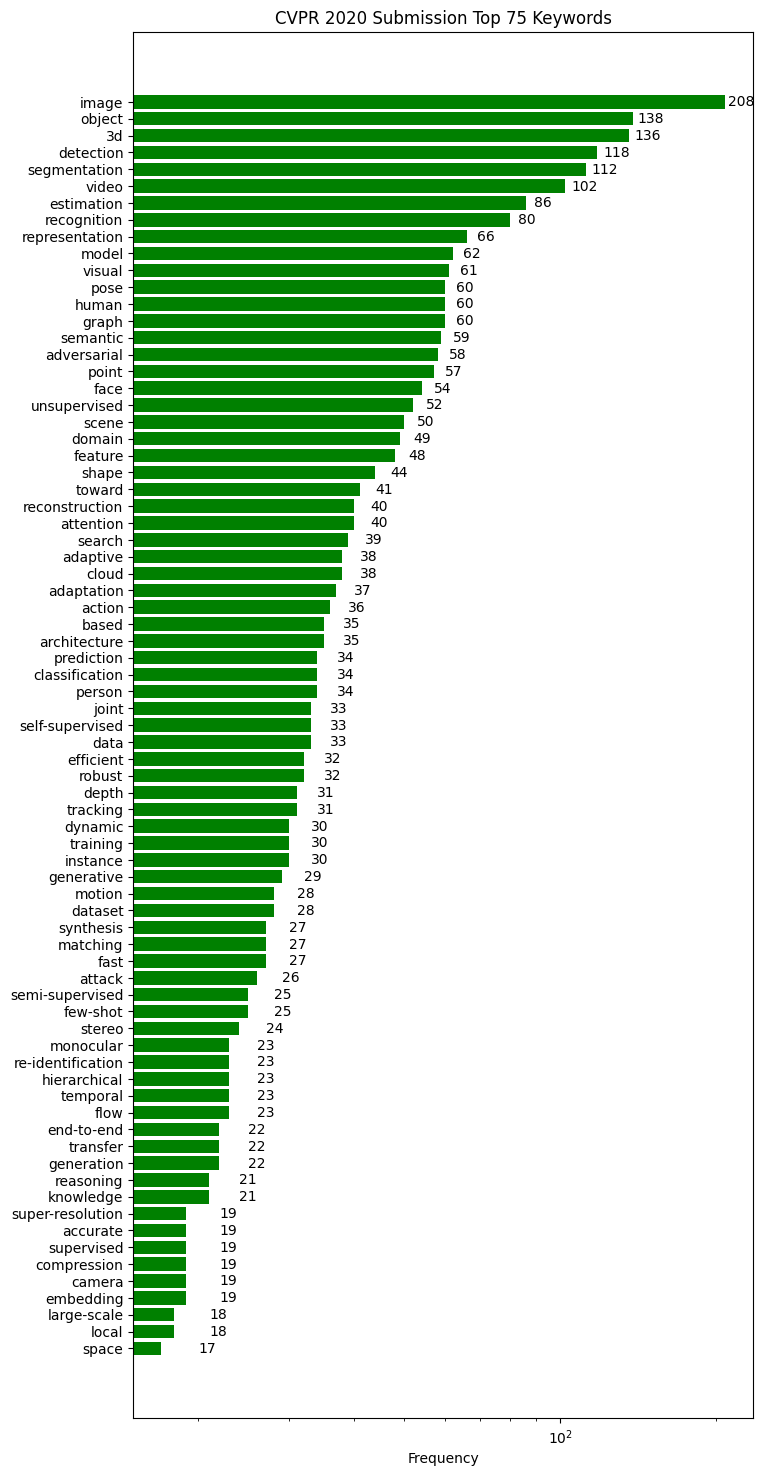

In [7]:
# Show N most common keywords and their frequencies
num_keyowrd = 75 #FIXME
keywords_counter_vis = keyword_counter.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 18))

key = [k[0] for k in keywords_counter_vis] 
value = [k[1] for k in keywords_counter_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel('Frequency')
ax.set_title('CVPR 2020 Submission Top {} Keywords'.format(num_keyowrd))

plt.show()

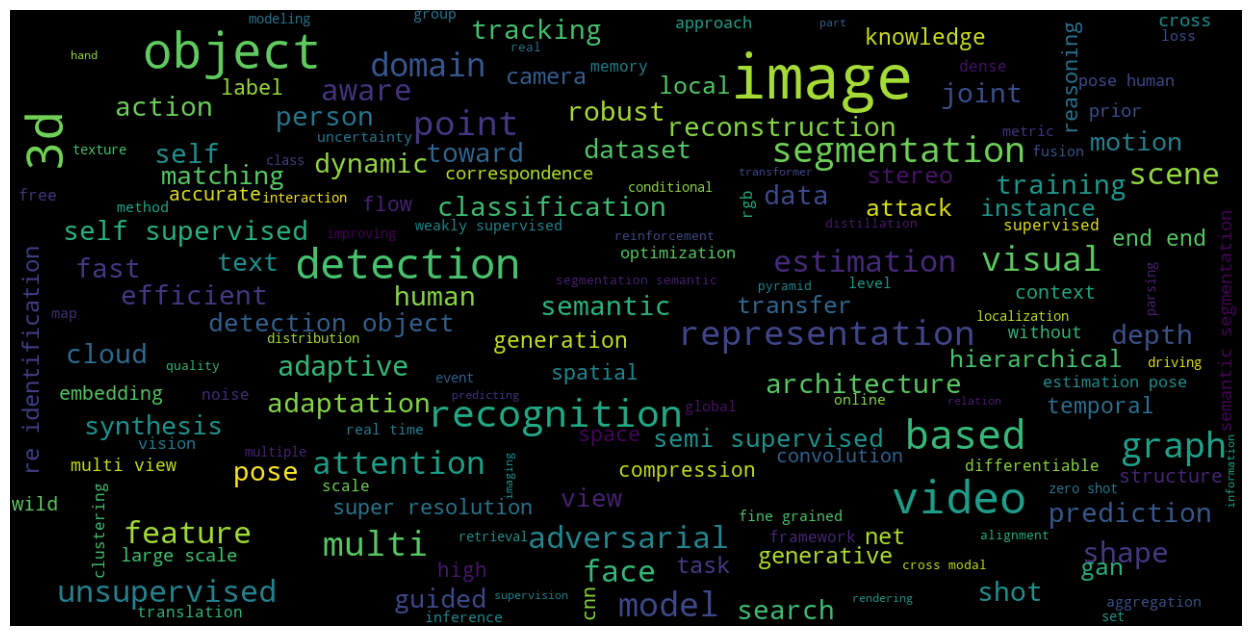

In [8]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=64, max_words=160, 
                      width=1280, height=640,
                      background_color="black").generate(' '.join(keyword_list))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()